### Retrieval Augmented Generation
![title](img/RAG.png)

![image](img/microsoft_annual_report_2022.png)

In [1]:
#from src.Chroma_RAG_utils import load_chroma, word_wrap, Query_Chroma, initiate_openai, RAG
from src.Chroma_RAG_utils import load_chroma
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()
# delete collection if needed
# chroma_client.delete_collection(name="microsoft_annual_report_2022") 

chroma_collection = load_chroma(filename='microsoft_annual_report_2022.pdf', collection_name='microsoft_annual_report_2022', embedding_function=embedding_function)
chroma_collection.count()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


349

### Sentence Transformers
![title](img/Sentence_Transformer.png)

In [2]:
# Query Chroma DB
from src.Chroma_RAG_utils import Query_Chroma
query = "What is the total revenue?"

retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = True)


0: revenue, classified by significant product and service offerings, was
as follows : ( in millions ) year ended june 30, 2022 2021 2020 server
products and cloud services $ 67, 321 $ 52, 589 $ 41, 379 office
products and cloud services 44, 862 39, 872 35, 316 windows 24, 761 22,
488 21, 510 gaming 16, 230 15, 370 11, 575 linkedin 13, 816 10, 289 8,
077 search and news advertising 11, 591 9, 267 8, 524 enterprise
services 7, 407 6, 943 6, 409 devices 6, 991 6, 791 6, 457 other 5, 291
4, 479 3, 768 total $ 198, 270 $ 168, 088 $ 143, 015 we have recast
certain previously reported amounts in the table above to conform to
the way we internally manage and monitor our business.

1: 74 note 13 — unearned revenue unearned revenue by segment was as
follows : ( in millions ) june 30, 2022 2021 productivity and business
processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more
personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in
unearned revenue were as follows : ( in 

In [3]:
# Pass Documents to LLM
from src.Chroma_RAG_utils import initiate_openai, RAG, word_wrap
openai_client = initiate_openai("/Users/dovcohen/.NL2SQL_env")

content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Query: 
 What is the total revenue?
Answer: 
 The total revenue for the year ended June 30, 2022, is $198,270
million.


In [ ]:
query = "What has been the investment in research and development?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = False)
content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")




In [4]:
query = "What has been the investment in research and development?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = False)
content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")

Query: 
 What has been the investment in research and development?
Answer: 
 According to the information provided, the investment in research and
development for the year is $24,512 million, which represents an 18%
increase compared to the previous year. This investment was driven by
investments in cloud engineering, gaming, and LinkedIn. Microsoft also
maintains a long-term commitment to research and development across
various technologies and platforms, including digital work and life
experiences, cloud computing, AI, devices, and operating systems. They
operate research and development facilities in different locations
around the world.


In [5]:
query = "What is the strategy around artificial intelligence (AI) ?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = False)
content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")

Query: 
 What is the strategy around artificial intelligence (AI) ?
Answer: 
 The annual report mentions that Microsoft has a commitment to
responsibly develop and use technologies like AI. They have outlined 17
goals aligned with their six AI principles and have released a
responsible AI standard. They provide tools and practices to support
these goals, such as the responsible AI dashboard, which helps
developers identify and mitigate issues before deploying AI
technologies. Microsoft also emphasizes transparency in how they run
their business and work with customers and partners. They provide clear
reporting and information on their progress and learnings in their
annual impact summary. Additionally, Microsoft is helping organizations
apply advanced coding and language models to various use cases, such as
writing assistance, code generation, and reasoning over data, with
their Azure OpenAI service.


In [ ]:
query = "what year will microsoft be carbon neutral ?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = False)
content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")

In [ ]:
query = "how many tons of carbon did microsoft pay to remove in 2021?"
retrieved_docs, retrieved_embeddings  = Query_Chroma(chroma_collection, query, n_results = 5, verbose = False)
content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")

In [ ]:
query =  "What is the investment commitment for climate solutions?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = False)
content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")

### Visualization via Uniform Manifold Approximation

/Users/dovcohen/opt/anaconda3/envs/LLM_3.11/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
100%|██████████| 349/349 [02:24<00:00,  2.41it/s]


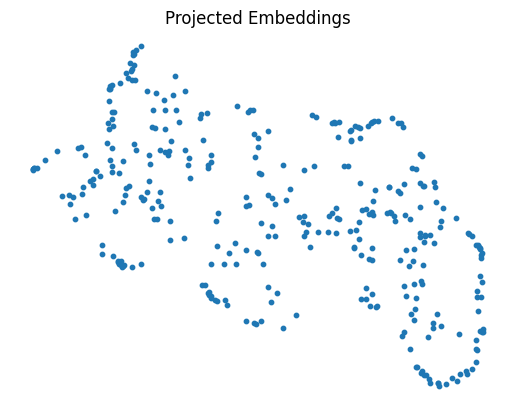

In [6]:
# Chroma Collection
from src.Umap_utilities import display_embeddings, project_embeddings, umap_transform

embeddings, ut = umap_transform(chroma_collection)
pt = project_embeddings(embeddings, ut)
display_embeddings( projected_dataset_embeddings = pt
                   ,Title="Projected Embeddings")

0: revenue, classified by significant product and service offerings, was
as follows : ( in millions ) year ended june 30, 2022 2021 2020 server
products and cloud services $ 67, 321 $ 52, 589 $ 41, 379 office
products and cloud services 44, 862 39, 872 35, 316 windows 24, 761 22,
488 21, 510 gaming 16, 230 15, 370 11, 575 linkedin 13, 816 10, 289 8,
077 search and news advertising 11, 591 9, 267 8, 524 enterprise
services 7, 407 6, 943 6, 409 devices 6, 991 6, 791 6, 457 other 5, 291
4, 479 3, 768 total $ 198, 270 $ 168, 088 $ 143, 015 we have recast
certain previously reported amounts in the table above to conform to
the way we internally manage and monitor our business.

1: 74 note 13 — unearned revenue unearned revenue by segment was as
follows : ( in millions ) june 30, 2022 2021 productivity and business
processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more
personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in
unearned revenue were as follows : ( in 

100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


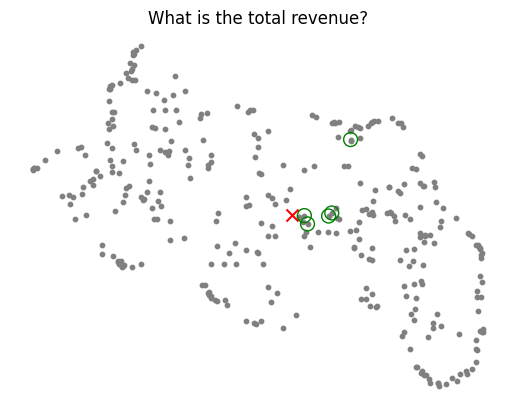

In [7]:
query = "What is the total revenue?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = True)

query_embedding = embedding_function([query])[0]
projected_query_embedding = project_embeddings([query_embedding], ut)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, ut)
display_embeddings( projected_dataset_embeddings = pt
                   ,projected_query_embedding=projected_query_embedding
                   ,projected_retrieved_embeddings=projected_retrieved_embeddings
                   ,Title=query)

0: culture of trust can help navigate the challenges the world faces
today. organizations of all sizes have digitized business - critical
functions, redefining what they can expect from their business
applications. customers are looking to unlock value while simplifying
security and management. from infrastructure and data, to business
applications and collaboration, we provide unique, differentiated value
to customers. we are building a distributed computing fabric – across
cloud and the edge – to help every organization build, run, and manage
mission - critical workloads anywhere. in the next phase of innovation,
artificial intelligence ( “ ai ” ) capabilities are rapidly advancing,
fueled by data and knowledge of the world. we are enabling metaverse
experiences at all layers of our stack, so customers can more
effectively model, automate, simulate, and predict changes within their
industrial

1: every organization turn its data into predictive and analytical power.
with our new micr

100%|██████████| 5/5 [00:02<00:00,  2.39it/s]


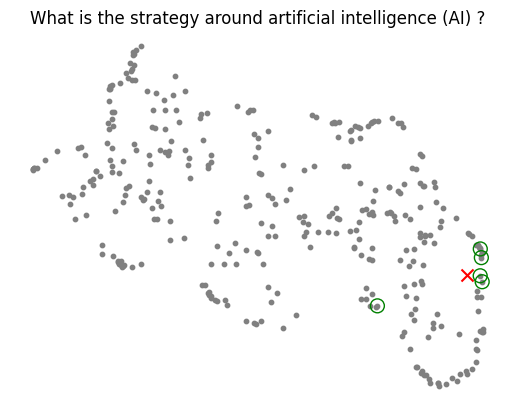

In [8]:
query = "What is the strategy around artificial intelligence (AI) ?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = True)

query_embedding = embedding_function([query])[0]
projected_query_embedding = project_embeddings([query_embedding], ut)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, ut)
display_embeddings( projected_dataset_embeddings = pt
                   ,projected_query_embedding=projected_query_embedding
                   ,projected_retrieved_embeddings=projected_retrieved_embeddings
                   ,Title=query)


0: • operating expenses increased $ 1. 5 billion or 14 % driven by
investments in gaming, search and news advertising, and windows
marketing. operating expenses research and development ( in millions,
except percentages ) 2022 2021 percentage change research and
development $ 24, 512 $ 20, 716 18 % as a percent of revenue 12 % 12 %
0ppt research and development expenses include payroll, employee
benefits, stock - based compensation expense, and other headcount -
related expenses associated with product development. research and
development expenses also include third - party development and
programming costs, localization costs incurred to translate software
for international markets, and the amortization of purchased software
code and services content. research and development expenses increased
$ 3. 8 billion or 18 % driven by investments in cloud engineering,
gaming, and linkedin. sales and marketing

1: competitive in local markets and enables us to continue to attract top
talent f

100%|██████████| 5/5 [00:01<00:00,  2.62it/s]


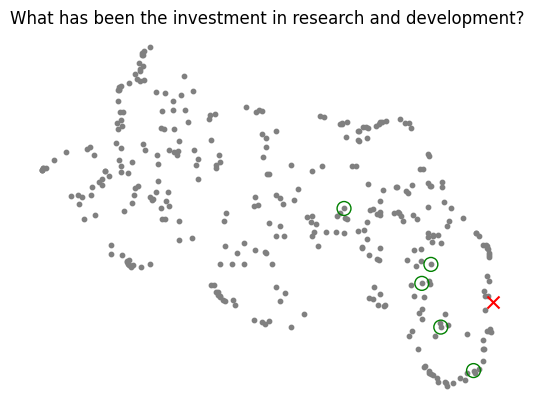

In [10]:
query = "What has been the investment in research and development?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = True)

query_embedding = embedding_function([query])[0]
projected_query_embedding = project_embeddings([query_embedding], ut)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, ut)
display_embeddings( projected_dataset_embeddings = pt
                   ,projected_query_embedding=projected_query_embedding
                   ,projected_retrieved_embeddings=projected_retrieved_embeddings
                   ,Title=query)



In [ ]:
query =  "What is the investment commitment for climate solutions?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = True)

query_embedding = embedding_function([query])[0]
projected_query_embedding = project_embeddings([query_embedding], ut)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, ut)
display_embeddings( projected_dataset_embeddings = pt
                   ,projected_query_embedding=projected_query_embedding
                   ,projected_retrieved_embeddings=projected_retrieved_embeddings
                   ,Title=query)

100%|██████████| 5/5 [00:02<00:00,  2.41it/s]


Query: 
 Was there significant turnover in the executive team? 

Answer: 
 Based on the information provided in the annual report, there is no
direct mention of significant turnover in the executive team. The
report primarily focuses on the audit and internal control processes,
financial statements, and the opinions of Deloitte & Touche LLP, the
independent registered public accounting firm.


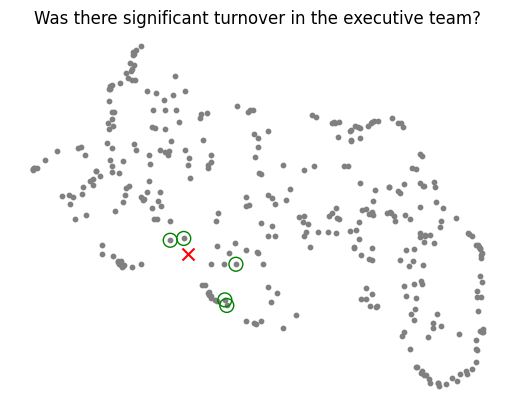

In [17]:
query = "Was there significant turnover in the executive team?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 5, verbose = False)

query_embedding = embedding_function([query])[0]
projected_query_embedding = project_embeddings([query_embedding], ut)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, ut)
display_embeddings( projected_dataset_embeddings = pt
                   ,projected_query_embedding=projected_query_embedding
                   ,projected_retrieved_embeddings=projected_retrieved_embeddings
                   ,Title=query)



## Query Expansion
1. Expansion With Generated Answers
2. Expansion with Multiple Queries

### Expansion With Generated Answers
![title](img/Expansion_with_generated_answers.png)

What is the strategy around artificial intelligence (AI) ? Our strategy
around artificial intelligence (AI) is focused on leveraging this
technology to enhance our business operations and create value for our
customers. We are investing in AI to improve efficiency, optimize
decision-making processes, and provide personalized experiences to our
customers.

One aspect of our AI strategy is to automate routine tasks
and streamline processes. By using AI algorithms and machine learning,
we aim to enhance the accuracy and speed of various operational
activities, such as data analysis, risk assessment, and fraud
detection. This will not only save time and resources but also improve
the overall efficiency of our operations.

Additionally, we are
exploring opportunities to leverage AI in our customer-facing services.
Through advanced data analytics and AI-powered recommendation engines,
we aim to provide personalized product and service offerings to our
customers. This will enable us to enhanc

100%|██████████| 5/5 [00:02<00:00,  2.47it/s]


Query: 
 What is the strategy around artificial intelligence (AI) ? 

Answer: 
 The provided information does not explicitly mention the strategy
around artificial intelligence (AI). However, it does mention that
Microsoft is rapidly advancing AI capabilities fueled by data and
knowledge of the world. They are enabling metaverse experiences and
helping customers model, automate, simulate, and predict changes within
their industries using AI. Microsoft is also accelerating adoption of
AI innovations from research to products and helping organizations
apply advanced coding and language models through their Azure OpenAI
service.


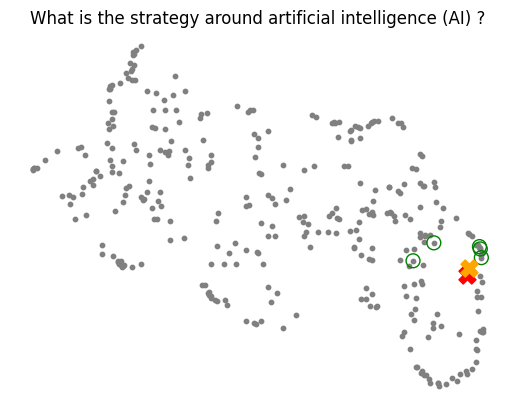

In [21]:
from src.Chroma_RAG_utils import Query_Expansion_augment_query, Query_Expansion_Multiple_Queries
query = "What has been the investment in research and development?"
query = "What is the strategy around artificial intelligence (AI) ?"

aug_query = Query_Expansion_augment_query(openai_client, query, verbose=True)
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, aug_query, n_results = 5, verbose = False)

original_query_embedding = embedding_function([query])
augmented_query_embedding = embedding_function([aug_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, ut)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, ut)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, ut)

display_embeddings( projected_dataset_embeddings = pt
                   ,projected_original_query_embedding=projected_original_query_embedding
                   ,projected_retrieved_embeddings=projected_retrieved_embeddings
                   ,projected_augmented_query_embedding = projected_augmented_query_embedding
                   ,Title=query)

content = RAG(openai_client, query, retrieved_docs, model="gpt-3.5-turbo")
print(f'Query: \n {query} \n')
print(f"Answer: \n {word_wrap(content)}")

### Expansion with Multiple Queries

![title](img/Expansion_with_multiple_queries.png)

In [22]:
query = "What were the most important factors that contributed to increases in revenue?"
augmented_queries, queries = Query_Expansion_Multiple_Queries(openai_client, query, verbose=False)
for i in augmented_queries:
    print(i)
print('')
#print(queries)
results = chroma_collection.query(query_texts=queries, n_results=5, include=['documents', 'embeddings'])
retrieved_docs_multiple = results['documents']
retrieved_embeddings = results['embeddings']
# Deduplicate the retrieved documents
unique_documents = set()
for documents in retrieved_docs_multiple:
    for document in documents:
        unique_documents.add(document)


for i, documents in enumerate(retrieved_docs_multiple):
    print('Queries')
    print(f"Query {i}: {queries[i]}")
    print('')
    print("Results:")
    for doc in documents:
        print(word_wrap(doc))
        print('')
    print('-'*100)



What were the major expense categories that impacted net income?
What were the key drivers behind the company's profit margin improvements?
Did any specific geographic regions show significant revenue growth? 
What were the key product lines that experienced the highest revenue growth?
What were the main strategies implemented to expand market share and drive revenue growth?

['What were the most important factors that contributed to increases in revenue?', 'What were the major expense categories that impacted net income?', "What were the key drivers behind the company's profit margin improvements?", 'Did any specific geographic regions show significant revenue growth? ', 'What were the key product lines that experienced the highest revenue growth?', 'What were the main strategies implemented to expand market share and drive revenue growth?']
Queries
Query 0: What were the most important factors that contributed to increases in revenue?

Results:
engineering, gaming, and linkedin. • sa

100%|██████████| 30/30 [00:12<00:00,  2.44it/s]


Query: 
 What were the most important factors that contributed to increases in revenue?
Answer: 
 The most important factors that contributed to increases in revenue
include:

1. Microsoft Cloud (formerly commercial cloud) revenue
increased by 32% to $91.2 billion.
2. Office commercial products and
cloud services revenue increased by 13% driven by Office 365 commercial
growth of 18%.
3. Office consumer products and cloud services revenue
increased by 11% and Microsoft 365 consumer subscribers grew to 59.7
million.
4. LinkedIn revenue increased by 34%.
5. Dynamics products and
cloud services revenue increased by 25% driven by Dynamics 365 growth
of 39%.
6. Server products and cloud services revenue increased by 28%
driven by Azure and other cloud services growth of 45%.
7. Windows
Original Equipment Manufacturer (OEM) licensing revenue increased by
11%.
8. Windows commercial products and cloud services revenue
increased by 11%.
9. Xbox content and services revenue increased by
3%.
10. S

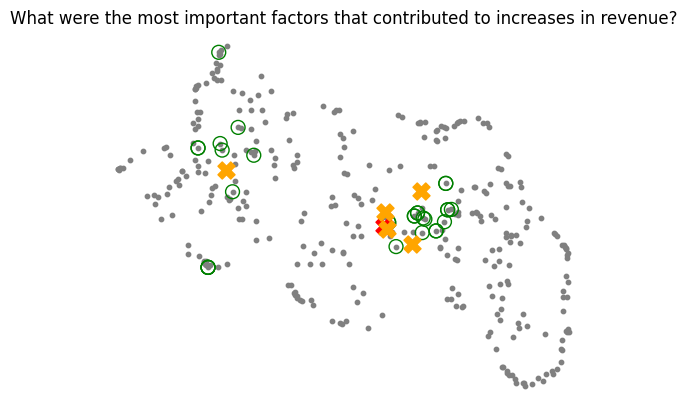

In [23]:
original_query_embedding = embedding_function([query])
augmented_query_embedding = embedding_function(augmented_queries)

projected_original_query_embedding = project_embeddings(original_query_embedding, ut)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, ut)

result_embeddings = retrieved_embeddings 
result_embeddings = [item for sublist in result_embeddings for item in sublist]
projected_result_embeddings = project_embeddings(result_embeddings, ut)

display_embeddings( projected_dataset_embeddings = pt
                   ,projected_original_query_embedding=projected_original_query_embedding
                   ,projected_retrieved_embeddings=projected_result_embeddings
                   ,projected_augmented_query_embedding = projected_augmented_query_embedding
                   ,Title=query)

content = RAG(openai_client, query, unique_documents, model="gpt-3.5-turbo")
print(f'Query: \n {query}')
print(f"Answer: \n {word_wrap(content)}")


### Cross Encoder ReRanking

![image](img/Cross-Encoder_ReRanking.png)

### Cross Encoder

![image](img/Cross-Encoder.png)

![image](img/Cross-Encoder-Docs.png)

In [25]:
from sentence_transformers import CrossEncoder
import numpy as np
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

query = "What were the most important factors that contributed to increases in revenue?"
retrieved_docs, retrieved_embeddings = Query_Chroma(chroma_collection, query, n_results = 10, verbose=False)
pairs = [[query, doc] for doc in retrieved_docs]
scores = cross_encoder.predict(pairs)
print("Scores:")
for score in scores:
    print(score)

print("New Ordering:")
for o in np.argsort(scores)[::-1]:
    print(o+1)

Scores:
-5.2747498
-6.9020915
-8.505106
-7.490654
-1.1369977
-3.768153
-3.7948637
-7.7541
-4.6518908
-10.711212
New Ordering:
5
6
7
9
1
2
4
8
3
10


### Embedding Adapter

![image](img/Embedding_Adapter.png)

In [27]:
def generate_queries(openai_client, model="gpt-3.5-turbo"):
    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert financial research assistant. You help users analyze financial statements to better understand companies. "
            "Suggest 10 to 15 short questions that are important to ask when analyzing an annual report. "
            "Do not output any compound questions (questions with multiple sentences or conjunctions)."
            "Output each question on a separate line divided by a newline."
        },
    ]

    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    content = content.split("\n")
    return content

In [28]:
generated_queries = generate_queries(openai_client)
for query in generated_queries:
    print(query)

1. What is the company's overall revenue growth rate?
2. How does the company's net income compare to the previous year?
3. What is the company's debt-to-equity ratio?
4. What are the company's key operating expenses?
5. How does the company's gross profit margin compare to industry peers?
6. What is the company's cash flow from operations?
7. Does the company have any significant off-balance sheet liabilities?
8. How does the company's return on assets compare to industry averages?
9. What is the company's dividend payout ratio?
10. Did the company repurchase any of its shares during the year?
11. What are the company's main sources of revenue?
12. How has the company's inventory turnover ratio changed over time?
13. What are the company's long-term growth prospects?
14. What percentage of the company's revenue comes from its largest customers?
15. How has the company's working capital position evolved over the year?


In [29]:
results = chroma_collection.query(query_texts=generated_queries, n_results=10, include=['documents', 'embeddings'])
retrieved_documents = results['documents']

retrieved_embeddings = results['embeddings']
query_embeddings = embedding_function(generated_queries)

In [30]:

def evaluate_results(openai_client, query, statement, model="gpt-3.5-turbo"):
    messages = [
    {
        "role": "system",
        "content": "You are a helpful expert financial research assistant. You help users analyze financial statements to better understand companies. "
        "For the given query, evaluate whether the following satement is relevant."
        "Output only 'yes' or 'no'."
    },
    {
        "role": "user",
        "content": f"Query: {query}, Statement: {statement}"
    }
    ]

    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=1
    )
    content = response.choices[0].message.content
    if content == "yes":
        return 1
    return -1

In [34]:
import torch
from tqdm import tqdm
import numpy as np
adapter_query_embeddings = []
adapter_doc_embeddings = []
adapter_labels = []
for q, query in enumerate(tqdm(generated_queries)):
    for d, document in enumerate(retrieved_documents[q]):
        adapter_query_embeddings.append(query_embeddings[q])
        adapter_doc_embeddings.append(retrieved_embeddings[q][d])
        adapter_labels.append(evaluate_results(openai_client, query, document))

# Recast as Torch Tensors
adapter_query_embeddings = torch.Tensor(np.array(adapter_query_embeddings))
adapter_doc_embeddings = torch.Tensor(np.array(adapter_doc_embeddings))
adapter_labels = torch.Tensor(np.expand_dims(np.array(adapter_labels),1))

# Dataset
dataset = torch.utils.data.TensorDataset(adapter_query_embeddings, adapter_doc_embeddings, adapter_labels)

# Model
def model(query_embedding, document_embedding, adaptor_matrix):
    updated_query_embedding = torch.matmul(adaptor_matrix, query_embedding)
    return torch.cosine_similarity(updated_query_embedding, document_embedding, dim=0)

# Loss function
def mse_loss(query_embedding, document_embedding, adaptor_matrix, label):
    return torch.nn.MSELoss()(model(query_embedding, document_embedding, adaptor_matrix), label)

# Initialize the adaptor matrix
mat_size = len(adapter_query_embeddings[0])
adapter_matrix = torch.randn(mat_size, mat_size, requires_grad=True)

min_loss = float('inf')
best_matrix = None

# Loop thru epochs
for epoch in tqdm(range(100)):
    for query_embedding, document_embedding, label in dataset:
        loss = mse_loss(query_embedding, document_embedding, adapter_matrix, label)

        if loss < min_loss:
            min_loss = loss
            best_matrix = adapter_matrix.clone().detach().numpy()

        loss.backward()
        with torch.no_grad():
            adapter_matrix -= 0.01 * adapter_matrix.grad
            adapter_matrix.grad.zero_()

print(f"Best loss: {min_loss.detach().numpy()}")


test_vector = torch.ones((mat_size,1))
scaled_vector = np.matmul(best_matrix, test_vector).numpy()




  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]/Users/dovcohen/opt/anaconda3/envs/LLM_3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 100/100 [00:07<00:00, 13.16it/s]

Best loss: 0.4479498267173767


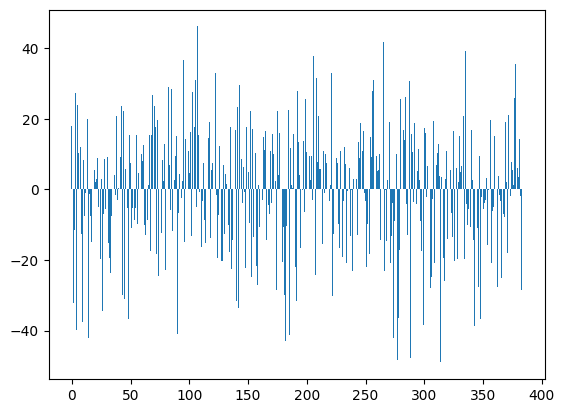

In [35]:
import matplotlib.pyplot as plt
plt.bar(range(len(scaled_vector)), scaled_vector.flatten())
plt.show()

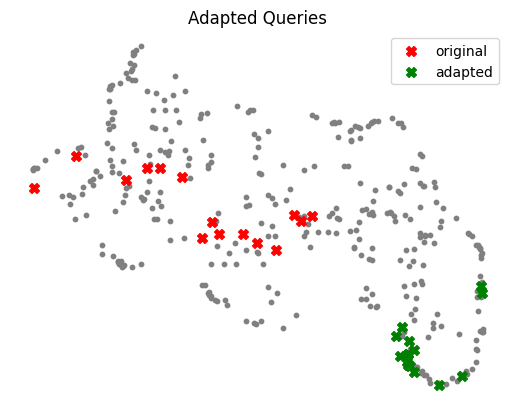

In [41]:
query_embeddings = embedding_function(generated_queries)
adapted_query_embeddings = np.matmul(best_matrix, np.array(query_embeddings).T).T

projected_query_embeddings = project_embeddings(query_embeddings, ut)
projected_adapted_query_embeddings = project_embeddings(adapted_query_embeddings, ut)

# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(pt[:, 0], pt[:, 1], s=10, color='gray')
plt.scatter(projected_query_embeddings[:, 0], projected_query_embeddings[:, 1], s=50, marker='X', color='r', label="original")
plt.scatter(projected_adapted_query_embeddings[:, 0], projected_adapted_query_embeddings[:, 1], s=50, marker='X', color='green', label="adapted")

plt.gca().set_aspect('equal', 'datalim')
plt.title("Adapted Queries")
plt.axis('off')
plt.legend()

In [ ]:
adapted_embeddings = np.matmul(best_matrix, np.array(embeddings).T).T
projected_adapted_embeddings = project_embeddings(adapted_embeddings, ut)

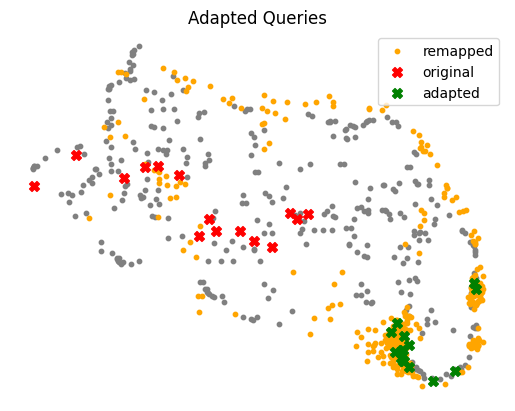

In [40]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(pt[:, 0], pt[:, 1], s=10, color='gray')
plt.scatter(projected_adapted_embeddings[:, 0], projected_adapted_embeddings[:, 1], s=10, color='orange', label="remapped")
plt.scatter(projected_query_embeddings[:, 0], projected_query_embeddings[:, 1], s=50, marker='X', color='r', label="original")
plt.scatter(projected_adapted_query_embeddings[:, 0], projected_adapted_query_embeddings[:, 1], s=50, marker='X', color='green', label="adapted")


plt.gca().set_aspect('equal', 'datalim')
plt.title("Adapted Queries")
plt.axis('off')
plt.legend()

### Other Techniques
![image](img/Other-Techniques.png)